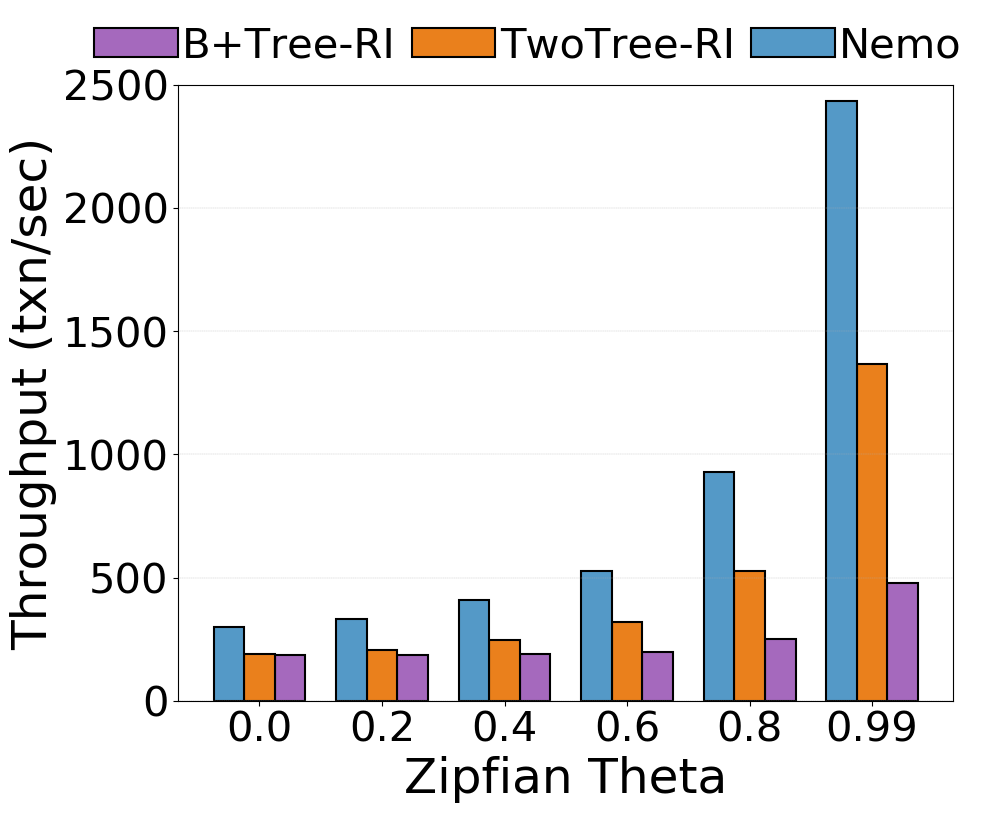

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from process_helper import select_color_idx
import matplotlib.colors as mcolors
txtsize=35
ticksize=30

color_indices, line_colors = select_color_idx(4)
lw = 1.5
bonsai_c = line_colors["BLUE"]
page_retain_c = line_colors["PURPLE"]
page_evict_c = "#78c679"
tt_retain_c =  "#ea801c"
tt_evict_c = "#54a1a1"


def shift(color, mix, alpha):
    a = mcolors.to_rgb(color)
    b = mcolors.to_rgb(mix)
    return mcolors.to_hex([(1 - alpha) * x + alpha * y for x, y in zip(a, b)])

page_evict_c = shift(page_retain_c, line_colors["GREEN"], 0.25)  # pull purple toward azure
tt_evict_c   = shift(tt_retain_c, line_colors["GREEN"], 0.25)   # pull orange toward warm yellow


bonsai_label = "Nemo"
page_idx_label = "B+Tree-RI"
page_idx_evict_label = "B+Tree-EI" 
tt_idx_label = "TwoTree-RI"
tt_idx_evict_label = "TwoTree-EI"


datadir = "../../output/"
exp_page = "exp_point_10g_page_unihotspot"
exp_page_idx_evict = "exp_point_10g_page_unihotspot_idx_evict"
exp_tuple = "exp_point_10g_tuple_unihotspot"
exp_twotree = "exp_point_10g_twotree_unihotspot"
exp_twotree_idx_evict = "exp_point_10g_twotree_unihotspot_idx_evict"
x_dimension = "zipf_theta_"



# Load and prepare the data
data_page = [json.loads(line) for line in open(datadir + exp_page + ".txt")]
df_page = pd.DataFrame().from_records(data_page).sort_values(by=x_dimension)

data_page_idx_evict = [json.loads(line) for line in open(datadir + exp_page_idx_evict + ".txt")]
df_page_idx_evict = pd.DataFrame().from_records(data_page_idx_evict).sort_values(by=x_dimension)

data_tuple = [json.loads(line) for line in open(datadir + exp_tuple + ".txt")]
df_tuple = pd.DataFrame().from_records(data_tuple).sort_values(by=x_dimension)

data_tt = [json.loads(line) for line in open(datadir + exp_twotree + ".txt")]
df_tt = pd.DataFrame().from_records(data_tt).sort_values(by=x_dimension)

data_tt_idx_evict = [json.loads(line) for line in open(datadir + exp_twotree_idx_evict + ".txt")]
df_tt_idx_evict = pd.DataFrame().from_records(data_tt_idx_evict)
df_tt_idx_evict = df_tt_idx_evict.sort_values(by=x_dimension)

dimension = "throughput_txn_per_sec"

bar_width = 0.25
indices = np.arange(len(df_page))
offset = bar_width


fig, ax1 = plt.subplots(figsize=(10, 8))


# Bar chart for the primary data
ax1.bar(indices + offset, df_page[dimension], bar_width,  edgecolor='black', linewidth=lw, label=page_idx_label, color=page_retain_c)
ax1.bar(indices, df_tt[dimension], bar_width,  edgecolor='black', linewidth=lw,label=tt_idx_label, color=tt_retain_c)
ax1.bar(indices - offset, df_tuple[dimension], bar_width,  edgecolor='black', linewidth=lw,label=bonsai_label, color=bonsai_c)

ax1.set_xticks(indices)
ax1.set_xticklabels(df_page[x_dimension])
# ax1.set_yscale('log')
ax1.set_ylim(0, 2500)

ax1.tick_params(axis='both', labelsize=ticksize)
ax1.set_ylabel("Throughput (txn/sec)", fontsize=txtsize)
ax1.set_xlabel("Zipfian Theta", fontsize=txtsize)
ax1.grid(axis='y', linestyle='--', linewidth=0.25)


legend = ax1.legend(fontsize=ticksize, bbox_to_anchor=(-0.13, 1.02, 1.1, .102), loc=2,
           ncol=3,borderaxespad=0., frameon=False,columnspacing=0.4, handletextpad=0.1)

plt.savefig("/home/hippo/Nemo/figures/ev1-skew-ro-tps.pdf",bbox_inches='tight')


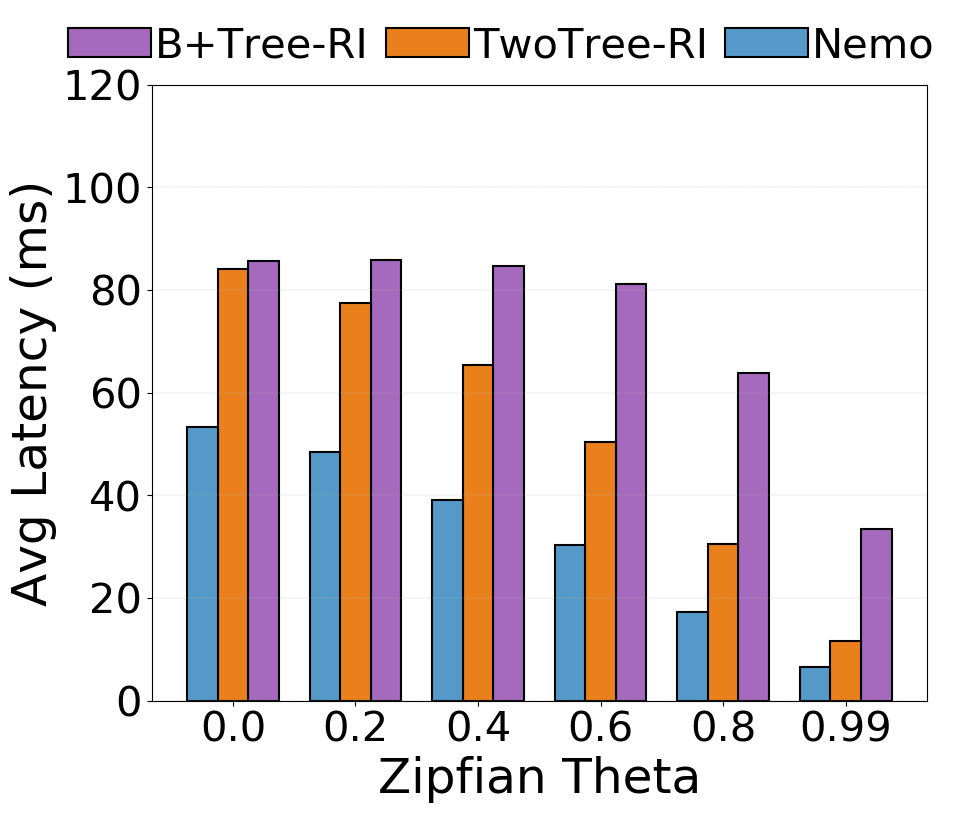

In [ ]:
dimension = "avg_sum_txn_latency (us)"

fig, ax1 = plt.subplots(figsize=(10, 8))

indices = np.arange(len(df_page))
offset = bar_width

# Bar chart for the primary data
ax1.bar(indices + offset, df_page[dimension]/1000.0, bar_width, edgecolor='black', linewidth=lw,label=page_idx_label, color=page_retain_c)
ax1.bar(indices, df_tt[dimension]/1000.0, bar_width, edgecolor='black', linewidth=lw,label=tt_idx_label, color=tt_retain_c)
ax1.bar(indices - offset, df_tuple[dimension]/1000.0, bar_width, edgecolor='black', linewidth=lw,label=bonsai_label, color=bonsai_c)

ax1.set_xticks(indices)
ax1.set_xticklabels(df_page[x_dimension])
ax1.tick_params(axis='both', labelsize=ticksize)
ax1.set_ylim(0, 120)
ax1.set_ylabel("Avg Latency (ms)", fontsize=txtsize)
ax1.set_xlabel("Zipfian Theta", fontsize=txtsize)
ax1.grid(axis='y', linestyle='--', linewidth=0.25)


legend = ax1.legend(fontsize=ticksize, bbox_to_anchor=(-0.13, 1.02, 1.1, .102), loc=2,
           ncol=3,borderaxespad=0., frameon=False,columnspacing=0.4, handletextpad=0.1)
plt.savefig("/home/hippo/Nemo/figures/ev1-skew-ro-avg-latency.pdf",bbox_inches='tight')
